In [1]:
from numpy import linspace, sin, cos, exp, pi, round
import numpy as np
import matplotlib.pyplot as plt
π = pi

In [2]:
# Set up some parameters
FREQ = 62.5 # Desired Frequency in Hz
OMEGA = ω = 2*π*FREQ
PHASE = 0
FS = 8000 # FS = 4096 = Analog-digital-converter sampling at this speed (128(MHz)
N = 8 # number of DFT points

In [3]:
t = linspace(0,1,FS) 

In [4]:
complexWave = exp(1j * ω * t + PHASE) # This is equivalent to [ cos(ωt)+ -1jSin(ωt) ]
cW = complexWave

In [5]:
# book walkthrough example for debugging. The wave and DFT equation will use this block instead of the 'complexWave variable'
FS = 8000 # FS
N = 8 # number of DFT points
t = linspace(0,1,FS-1) 
wave2 = sin(2*pi*1000*t)+0.5*sin(2*pi*2000*t + (3*pi/4))
wave2[0:8]

array([ 0.35355339,  0.3535534 ,  0.64672439,  1.0606598 ,  0.35221186,
       -1.0620479 , -1.35271847, -0.35160981])

**Lets make a plot!**

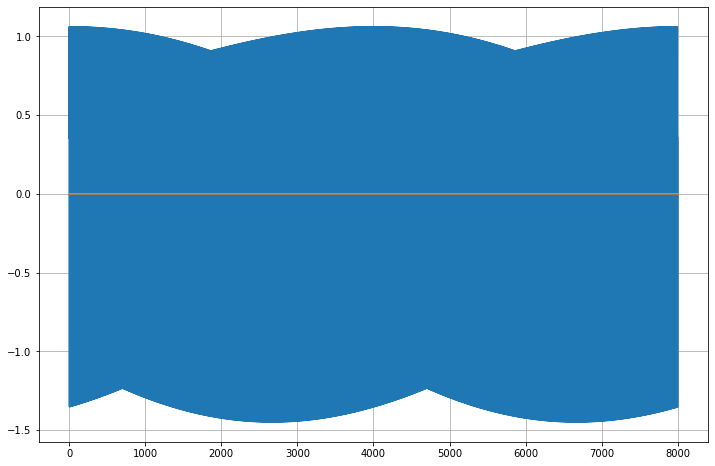

In [6]:
plt.figure(figsize=(12,8))
plt.plot(wave2.real)
plt.plot(wave2.imag)
# plt.xlim(-10,100)
plt.grid()
plt.show()

### Discrete Fourier Transform
_"Understanding Digital Signal Processing", RICHARD G LYONS: Chapter 3_


In [7]:
# My signal above has an FS of 
print("{} Hz".format(FS))

8000 Hz


In [8]:
# When I decide how many points my DFT will have or 'N'.
# This will result in the dft haveing fundamental frequency of FS/N
FF = FS/N
print("fanalysis is {0} Hz. the other x(m) frequencies will be integral multiples of {0}Hz such as {1}Hz, and {2}Hz".format(FF, FF*2, FF*3))

# it will divide my space up into 4 Hz Increments

fanalysis is 1000.0 Hz. the other x(m) frequencies will be integral multiples of 1000.0Hz such as 2000.0Hz, and 3000.0Hz


### DFT Equation
$ X(m) = \sum_{n=0}^{N-1}x(n)e^{-j2\pi nm/N} $ 

Which is equivalent to

$ X(m) = \sum_{n=0}^{N-1}x(n)[cos(2\pi nm / N) -1jsin(2\pi nm / N)]) $

From Euler's relationship

In [9]:
def dftEQ1(ts, N):
    """ This algo has been modified to print out all of it's calculations for debugging purposes. 
        
    """
    if N < 20:
        print("N DFT points < 20, logging calculations to file")
        file = open("discreteFourierTransform_eq1.txt", 'w')
        nPoints = N
        bigX = []
        for m in range(0, nPoints):
            x = 0
            for n in range(nPoints):
                x += ts[n] * exp(-1j*2*pi*n*m / nPoints)
                file.write("x({1}) * exp(-1j * 2 * π * {1} * {2} / {3}) ===> ".format(round(ts[n],4), n, m, nPoints))
                file.write("\t{0} * {1} \t = {2}\r\n".format(round(ts[n],3), round(exp(-1j*2*pi*n*m / nPoints),3), round(x,3)))
            bigX.append(x)
            xreal = round(x.real, 2)
            ximag = round(x.imag, 2)
            file.write("{0} ==> Magnitude = {1} ∠ {2}\r\n\r\n".format(round(x,3), round(np.sqrt(xreal**2 + ximag**2),2),
                                                                      round( (np.arctan(x.imag/x.real)*180) / pi, 1)))
        print("Analaysis Frequency = {} Hz".format(FS/nPoints))
        file.close()
        return np.array(bigX)
    else:
        nPoints = N
        bigX = []
        for m in range(0, nPoints):
            x = 0
            for n in range(nPoints):
                x += ts[n] * exp(-1j*2*pi*n*m / nPoints)
            bigX.append(x)
        print("Analaysis Frequency = {} Hz".format(FS/nPoints))
        return np.array(bigX)

def dftEQ2(ts, nPoints):
    bigX = []
    for m in range(nPoints):
        x = 0
        for n in range(nPoints):
            x = x + (ts[n]*cos((2*pi*n*m)/nPoints)) + (-1j*ts[n]*(sin((2*pi*n*m)/nPoints)))
        bigX.append(x)
    print("Analaysis Frequency = {} Hz or FS/N".format(FS/nPoints))
    return np.array(bigX)

In [10]:
result = dftEQ1(wave2, 8)

N DFT points < 20, logging calculations to file
Analaysis Frequency = 1000.0 Hz


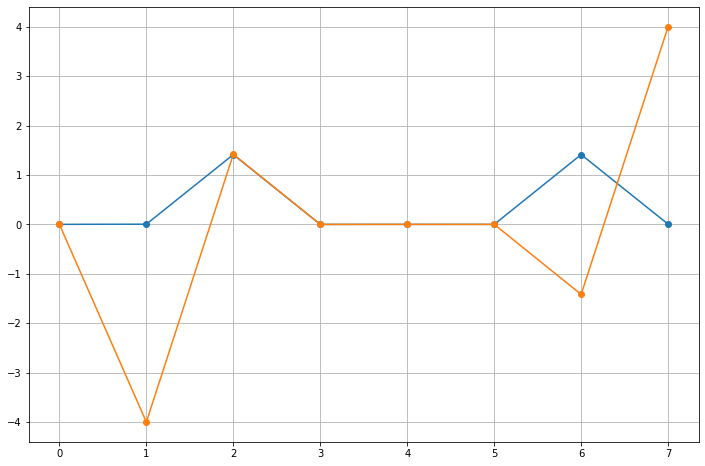

In [11]:
plt.figure(figsize=(12,8))
plt.plot(result.real, 'o-')
plt.plot(result.imag, 'o-')
# plt.xlim(0, FS/2)
# plt.xlim(490, 510)
plt.grid()
plt.show()

# DFT LEAKAGE

## SINC Functions

In [12]:
# sinc functions
x = linspace(-25, 25, 1000)
sincx = sin(x)/(x)
sincxNorm = sin(pi*x)/(pi*x)

### Plot of sinc functions

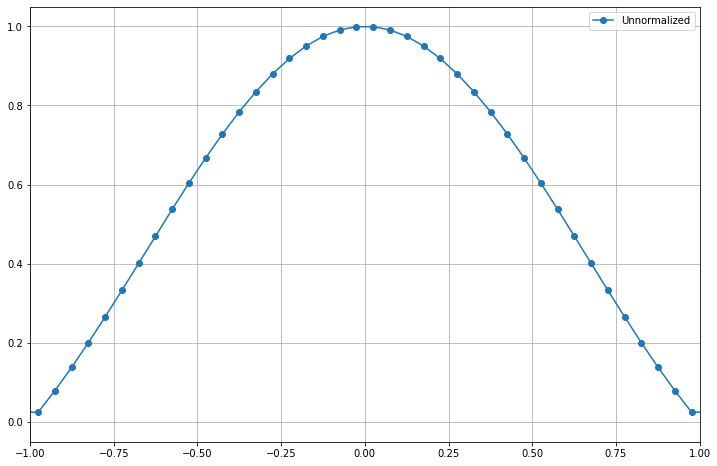

In [13]:
plt.figure(figsize=(12,8))
#plt.plot(x,abs(sincx), 'o-', )
plt.plot(x,abs(sincxNorm), 'o-')
plt.grid()
plt.xlim(-1, 1)
plt.legend(["Unnormalized", "Normalized"])
plt.show()

### Normalized Sinc Function

The normalized sinc function is the fourier transform of a square wave if I understand wikipedia correctly. Note: sinc functions will oscillate forever between [-inf, +inf]

## Simulations of DFT leakage

In [14]:
def doDFTLeak(FREQ, PHASE = 0, FS = 64, N = 64):
    # create a time space
    t = linspace(0, 1, FS) 
    OMEGA = ω = 2*π*FREQ
    complexWave = exp(1j * ω * t + PHASE) # This is equivalent to [ cos(ωt)+ -1jSin(ωt) ]
    cW = complexWave
    wave = cW.real
    FF = FS/N
    print("fanalysis is {0} Hz. the other x(m) frequencies will be integral multiples of {0}Hz such as {1}Hz, and {2}Hz".format(FF, FF*2, FF*3))
    
    # PLOT THE WAVE CREATED
    plt.figure(figsize=(18,10))
    plt.plot(wave, "-")
    plt.grid()
    plt.show()
    
    # perform the fft and analyze
    # result = np.fft.fft(wave, n=N)
    result = dftEQ1(wave, N)
    # PLOT THE RESULTS
    plt.figure(figsize=(18,10))
    # plt.plot(abs(result), "-o")
    # plt.bar(linspace(0,64, 64), height = abs(result), width = 0.2)
    plt.stem(linspace(0, FS, N), abs(result))
    plt.axvline(x=FREQ, color='red', linestyle='--')
    plt.axvline(x=FS/2, color='green', linestyle='--')
    # plt.xticks(linspace(0,64, 64))
    plt.grid()
    plt.show()
    
    return wave, result

### What we get when we do an fft for a frequency that lands in the center of a bin

fanalysis is 1.0 Hz. the other x(m) frequencies will be integral multiples of 1.0Hz such as 2.0Hz, and 3.0Hz


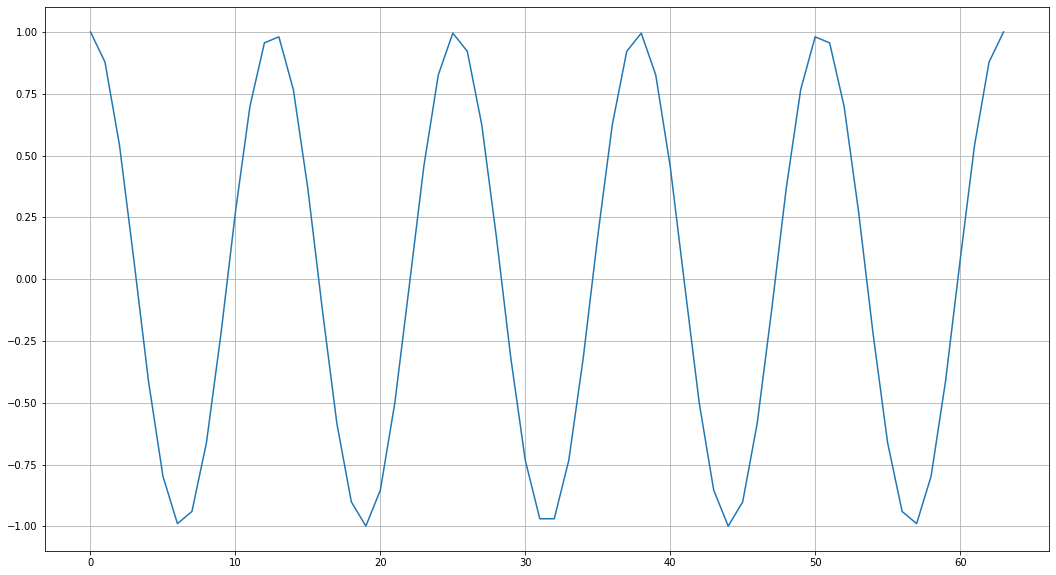

Analaysis Frequency = 125.0 Hz


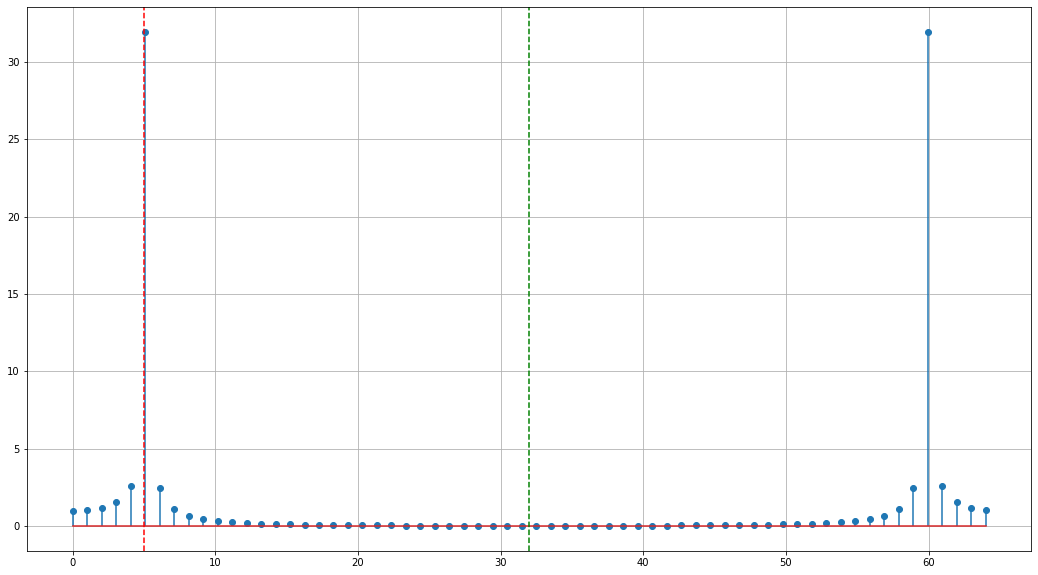

In [15]:
_ = doDFTLeak(5)

### What we get when we do an fft for a frequency that lands OFF-CENTER center of a bin

fanalysis is 1.0 Hz. the other x(m) frequencies will be integral multiples of 1.0Hz such as 2.0Hz, and 3.0Hz


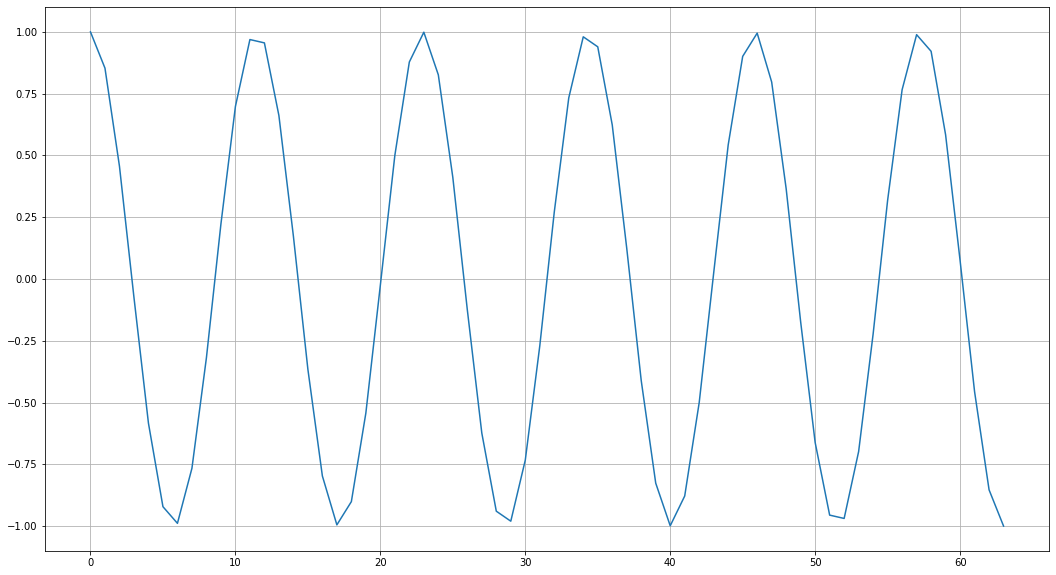

Analaysis Frequency = 125.0 Hz


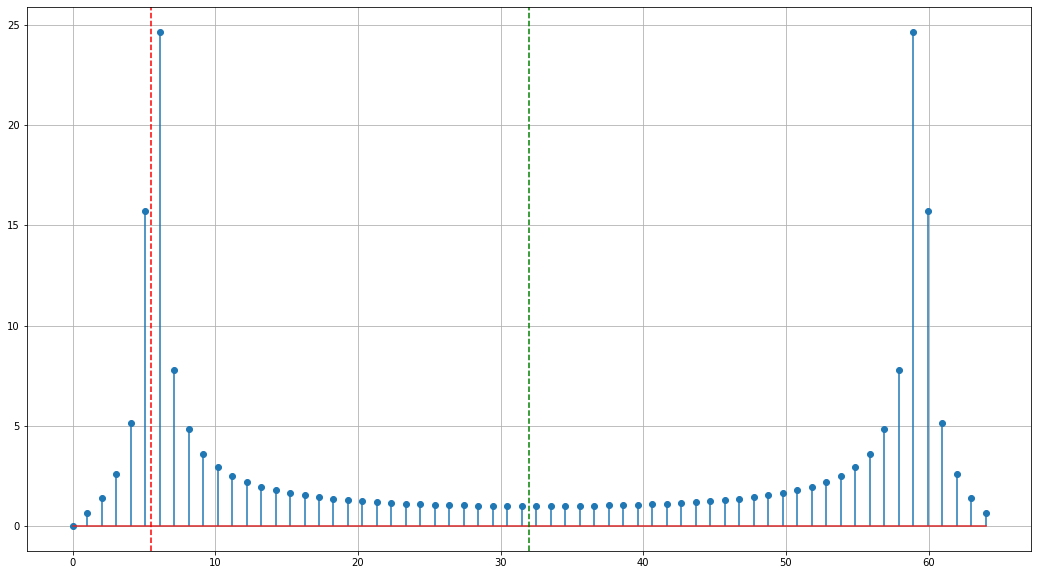

In [16]:
w,r = doDFTLeak(5.5, N=64)

## Notes
I observe that the frequency spectrum generated by the first FFT has most of the power in bin 5. In the second however, power leaked into every bin as seen in the above plot.

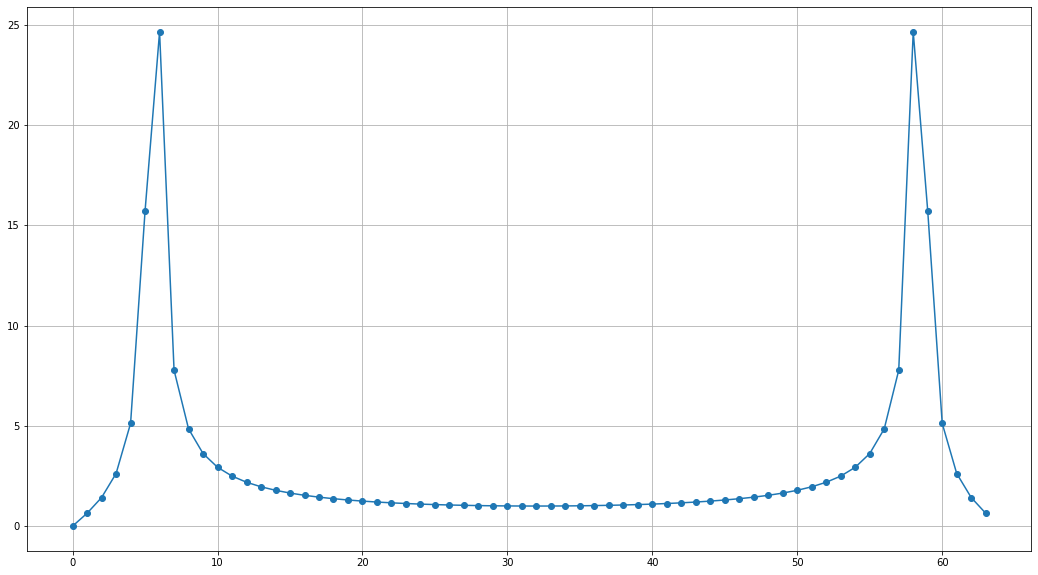

In [17]:
plt.figure(figsize=(18,10))
plt.plot(abs(r[0:128]), "-o")
plt.grid()
plt.show()

fanalysis is 125.0 Hz. the other x(m) frequencies will be integral multiples of 125.0Hz such as 250.0Hz, and 375.0Hz


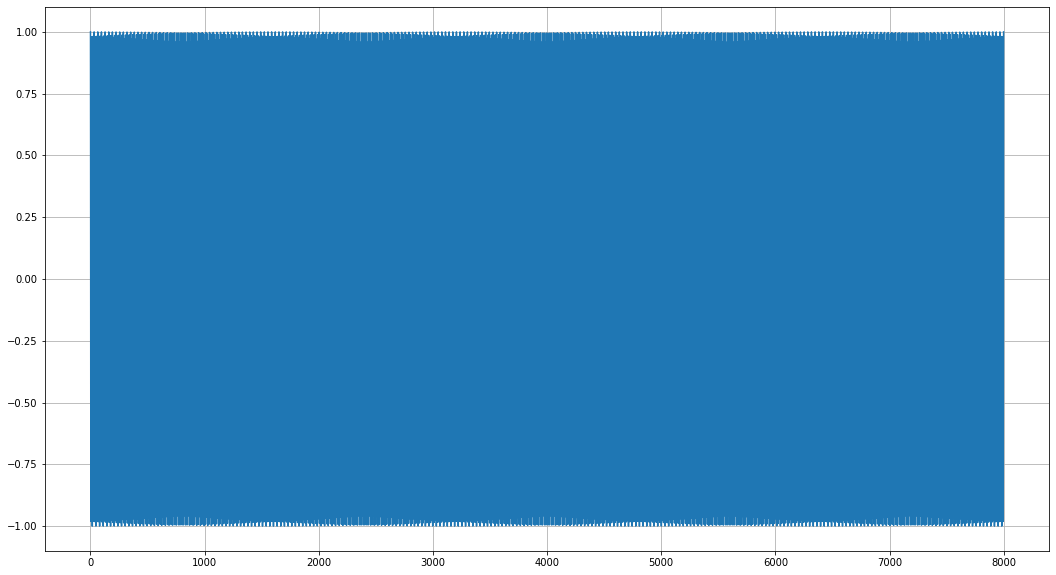

Analaysis Frequency = 125.0 Hz


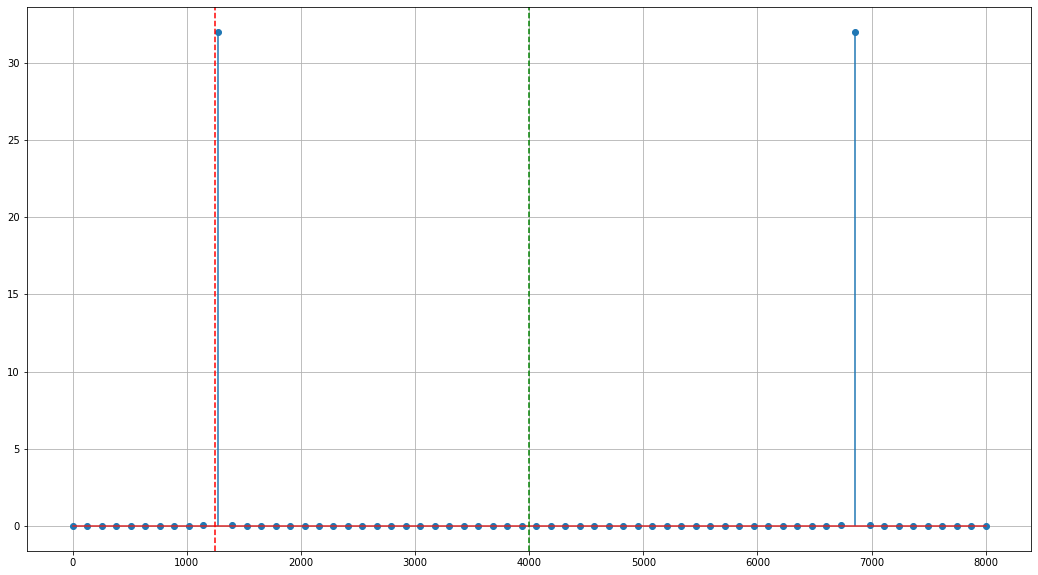

In [18]:
_ = doDFTLeak(125*10, FS=8000, N=64)

fanalysis is 125.0 Hz. the other x(m) frequencies will be integral multiples of 125.0Hz such as 250.0Hz, and 375.0Hz


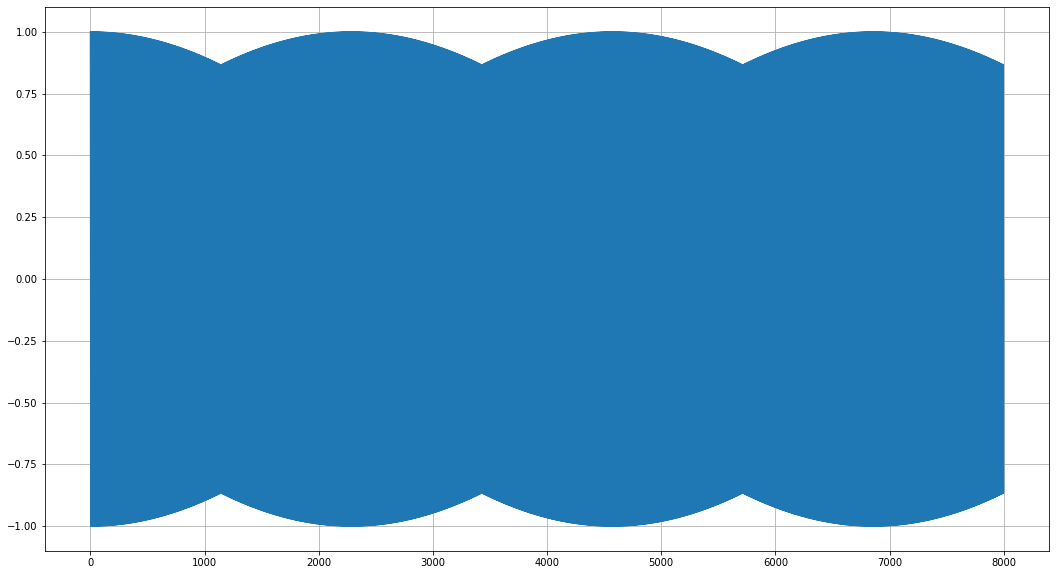

Analaysis Frequency = 125.0 Hz


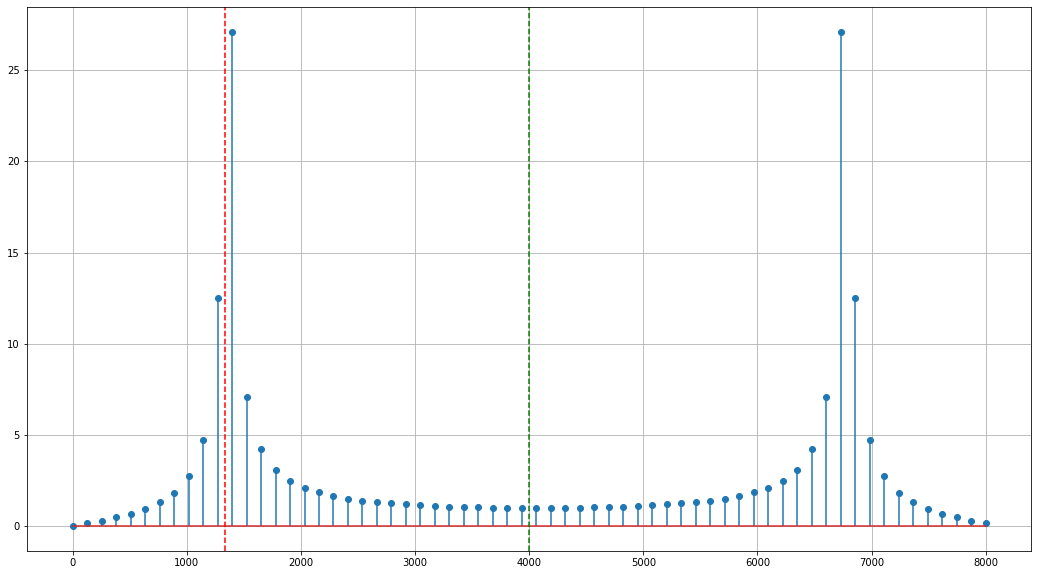

In [19]:
_ = doDFTLeak(125*10.67, FS=8000, N=64)